In [1]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
(alpha,beta1,beta2)=(1,1,-2)

x0 = np.ones(100)
x0 = np.reshape(x0,(100,1))
x1 =np.random.normal(loc=2,scale=1,size=(100,1))
x2 =np.random.poisson(4,(100,1))
eps = np.random.normal(loc=0,scale=1,size=(100,1))
y=alpha+beta1*x1+beta2*x2+eps


D:\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
X=np.concatenate((x0,x1,x2),axis=1)
XT=np.transpose(X)

XTX = (np.dot(XT,X))
XTXinv = np.linalg.inv(XTX)
XTy = (np.dot(XT,y))
beta_hat = np.dot(XTXinv,XTy)

print (beta_hat)


[[ 1.00040471]
 [ 1.04065135]
 [-1.97879789]]


In [3]:
print('alpha_hat is', beta_hat[0])
print('beta1_hat is', beta_hat[1])
print('beta2_hat is', beta_hat[2])

alpha_hat is [1.00040471]
beta1_hat is [1.04065135]
beta2_hat is [-1.97879789]


In [4]:
Cov = XTXinv
print (Cov)

[[ 0.0958457  -0.0217555  -0.01054145]
 [-0.0217555   0.0107996  -0.00018506]
 [-0.01054145 -0.00018506  0.00283804]]


In [5]:
#3
x0 = np.ones(100)
x0 = np.reshape(x0,(100,1))
x1 =np.random.normal(loc=2,scale=36,size=(100,1))
x2 =np.random.poisson(4,(100,1))
eps = np.random.normal(loc=0,scale=1,size=(100,1))
y=alpha+beta1*x1+beta2*x2+eps

X=np.concatenate((x0,x1,x2),axis=1)
XT=np.transpose(X)

XTX = (np.dot(XT,X))
XTXinv = np.linalg.inv(XTX)
XTy = (np.dot(XT,y))
beta_hat = np.dot(XTXinv,XTy)

print (beta_hat)

Cov2 = XTXinv
print (Cov2)
print ('variance of theta_hat become closer to zero.')


[[ 0.79282938]
 [ 1.00543085]
 [-1.96460259]]
[[ 6.16173777e-02  9.09853417e-05 -1.19602737e-02]
 [ 9.09853417e-05  8.62564023e-06 -2.47481164e-05]
 [-1.19602737e-02 -2.47481164e-05  2.77290509e-03]]
variance of theta_hat become closer to zero.


In [6]:
i = 1
beta = [ ]
(alpha,beta1,beta2)=(1,1,-2)
for i in range(1,1000):
    x0 = np.ones(100)
    x0 = np.reshape(x0,(100,1))
    x1 =np.random.normal(loc=2,scale=1,size=(100,1))
    x2 =np.random.poisson(4,(100,1))
    eps = np.random.normal(loc=0,scale=1,size=(100,1))
    y=alpha+beta1*x1+beta2*x2+eps
    X=np.concatenate((x0,x1,x2),axis=1)
    XT=np.transpose(X)
    XTX = (np.dot(XT,X))
    XTXinv = np.linalg.inv(XTX)
    XTy = (np.dot(XT,y))
    beta_hat = np.dot(XTXinv,XTy)
    beta.append(beta_hat)
    i=i+1

In [7]:
betaA = np.asarray(beta)
print(betaA)
betaB = np.transpose(betaA)
a = betaB[0]


#why is shape of betaA and betaB is 3-D

[[[ 0.88061219]
  [ 1.20333392]
  [-2.05578499]]

 [[ 0.82071065]
  [ 1.03500989]
  [-1.97413312]]

 [[ 1.25026437]
  [ 1.00554861]
  [-2.06116271]]

 ...

 [[ 0.9615678 ]
  [ 1.11375765]
  [-2.06532627]]

 [[ 1.34851343]
  [ 0.91791501]
  [-1.99582959]]

 [[ 1.39834857]
  [ 0.89755681]
  [-2.04188862]]]


In [8]:
n = 1000
Q = XTX/n
Qinv = np.linalg.inv(Q)
Var = Qinv/n

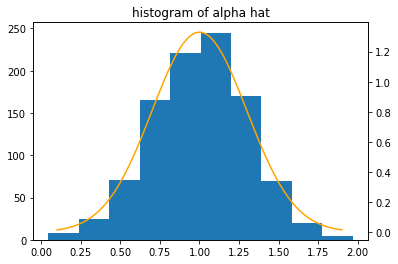

In [10]:
mu_alpha = 1
var_alpha = Var.item((0,0))
sigma_alpha = math.sqrt(var_a)
l = np.linspace(mu_alpha - 3*sigma_a, mu_a + 3*sigma_a, 100)

fig , ax1 = plt.subplots()
ax1.hist(a[0])
ax2 = ax1.twinx()
ax2.plot(l, stats.norm.pdf(l, mu_alpha, sigma_alpha),color='orange')
plt.title('histogram of alpha hat')
plt.show()

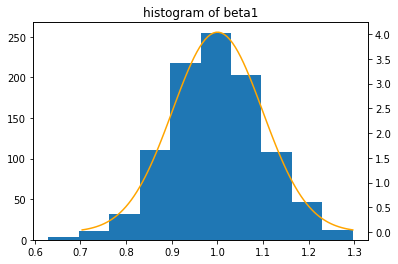

In [11]:
mu_b1 = 1
var_b1 = Var.item((1,1))
sigma_b1 = math.sqrt(var_b1)
l = np.linspace(mu_b1 - 3*sigma_b1, mu_b1 + 3*sigma_b1, 100)

fig ,ax1 = plt.subplots()
ax1.hist(a[1])
ax2 = ax1.twinx()
ax2.plot(l, stats.norm.pdf(l,mu_b1,sigma_b1),color = 'orange')

plt.title('histogram of beta1')
plt.show()

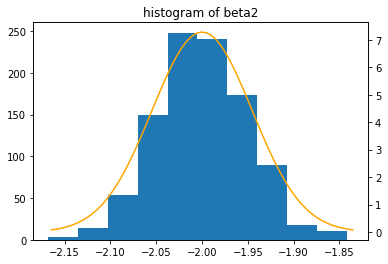

In [12]:
mu_b2 = -2
var_b2 = Var.item((2,2))
sigma_b2 = math.sqrt(var_b2)
l = np.linspace(mu_b2 - 3*sigma_b2, mu_b2 + 3*sigma_b2, 100)

fig, ax1 = plt.subplots()
ax1.hist(a[2])
ax2 = ax1.twinx()
ax2.plot (l, stats.norm.pdf(l,mu_b2,sigma_b2),color = 'orange')
plt.title('histogram of beta2')
plt.show()